In [31]:
# DAL Library
# version 0.1.0

source("load_harbinger.R")

#loading Harbinger
load_harbinger() # see ../load_harbinger.R 

In [32]:
#loading the example database
data(har_examples)

In [33]:
#Using the time series 1 
dataset <- har_examples[[5]]
head(dataset)

serie event
1 0.00  FALSE
2 0.25  FALSE
3 0.50  FALSE
4 0.75  FALSE
5 1.00  FALSE
6 1.25  FALSE

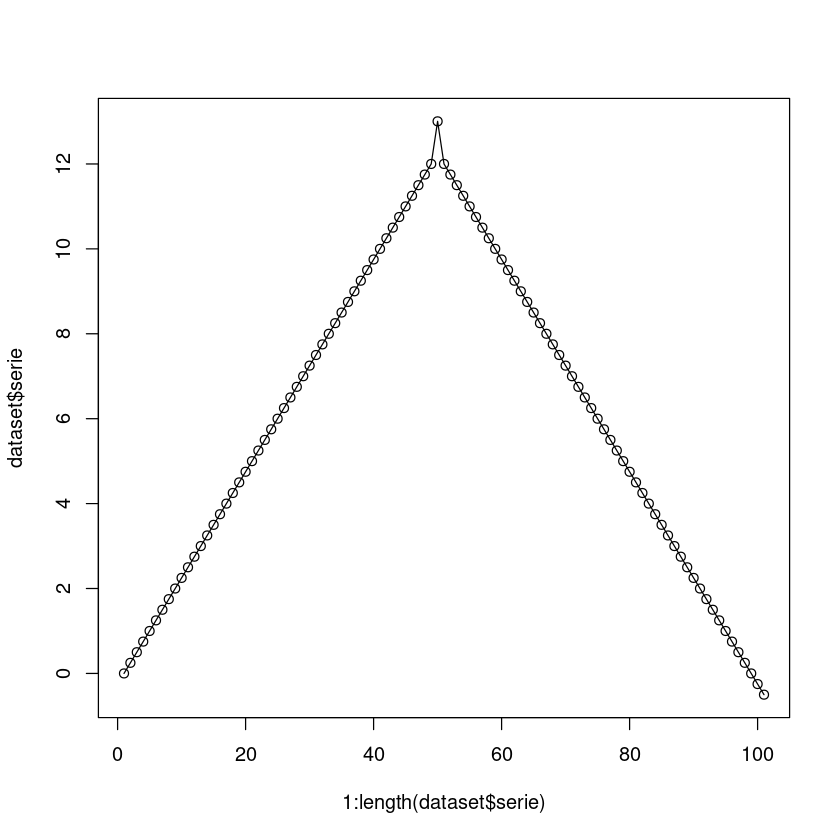

In [34]:
#ploting serie #1

plot(x = 1:length(dataset$serie), y = dataset$serie)
lines(x = 1:length(dataset$serie), y = dataset$serie)

In [35]:
# establishing change point method 
  model <- change_point(sw=30)

In [36]:
# fitting the model
  model <- fit(model, dataset$serie)

In [37]:
# making detections using fbiad
  detection <- detect(model, dataset$serie)

In [38]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

   idx event         type
1   43  TRUE change_point
2   44  TRUE change_point
3   45  TRUE change_point
4   46  TRUE change_point
5   47  TRUE change_point
6   48  TRUE change_point
7   49  TRUE change_point
8   50  TRUE change_point
9   51  TRUE change_point
10  52  TRUE change_point
11  53  TRUE change_point
12  54  TRUE change_point
13  55  TRUE change_point
14  56  TRUE change_point


In [39]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      1     13   
FALSE     0     87   


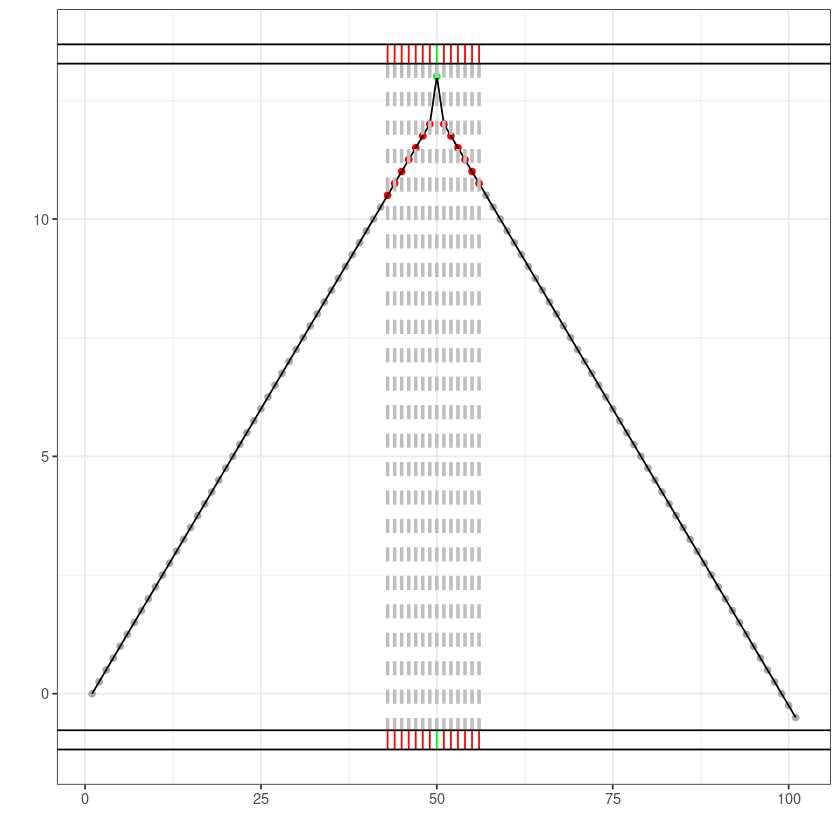

In [40]:
# ploting the results
  grf <- plot.harbinger(model, dataset$serie, detection, dataset$event)
  plot(grf)